In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import json

from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## Spotify Client Credentials 

+ I'm obtaining access to Spotify's song data using its Client Credentials Flow, which will allow me to access public data. The public data include the audio features associated with each track which append to the top charting song data for the trend analysis. I use Spotify's wrapper library [Spotipy](https://spotipy.readthedocs.io/en/2.16.1/) which lets me gain authorization and execute requests more easily. 

+ Note that the Client Credentials is distinct from Spotify's other access option, Authorization Code Flow. The former allows access to public data, while the latter provides access to private user data. 

+ _**Citation:**_ 
    - Code for for authorization inspired by a previous GA-DSI student's capstone [CNN_for_Dance_Music_Classification](https://github.com/amytaylor330/CNN_for_Dance_Music_Classification), which is very informative and well-documented. 
    - Support for how to structure the `json.load(json_file)` control flow came from Hovanes Gasparian. Thanks Hov!

In [31]:
with open("../spotify_credentials.json", "r") as json_file:
    creds = json.load(json_file)

my_client_id = creds['SPOTIPY_CLIENT_ID']
my_client_secret = creds['SPOTIPY_CLIENT_SECRET']

client_credentials_manager = SpotifyClientCredentials(client_id=my_client_id, client_secret=my_client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Getting Italy's top songs 2017-2020

+ _All lists of top 200 / viral 50 song gathered from [Spotify Charts Regional](https://spotifycharts.com/regional/)_

+ _Data are written as both a csv file and a SQLLite db._ 

+ _**Citation:** Code for how to scrape [Spotify Charts Regional](https://spotifycharts.com/regional/) is inspired by the excellent documentation for the [Unofficial Spotify Charts API](https://github.com/kelvingakuo/fycharts) called `fycharts`._

#### Italy Top 200 Daily, 2017

In [11]:
api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///italy_2017.db", echo=False)
api.top200Daily(output_file = "../data/italy_2017.csv", output_db = connector, webhook = ["https://mywebhookssite.com/post/"], start = "2017-01-01", end = "2017-12-31", region = "it")

INFO : 10/02/2021 08:23:54 PM : Extracting top 200 daily for 2017-01-01 - it
INFO : 10/02/2021 08:23:54 PM : Extracting top 200 daily for 2017-01-02 - it
INFO : 10/02/2021 08:23:54 PM : POSTing data to the endpoint https://mywebhookssite.com/post/
INFO : 10/02/2021 08:23:54 PM : Appending data to the table top_200_daily
INFO : 10/02/2021 08:23:54 PM : Appending data to the file ../data/italy_2017.csv...
Exception in thread INFO : 10/02/2021 08:23:54 PM : Done appending to the file ../data/italy_2017.csv!!!
Thread-12:
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/socket.py", line 918,

In [14]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/capstone/code'

In [10]:
# reading in csv from output file  
italy_2017 = pd.read_csv('../data/italy_2017.csv')
italy_2017.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,71014,2017-01-01,it,5knuzwU65gJK7IF5yJsuaW
1,2,Tutto Molto Interessante,Fabio Rovazzi,54803,2017-01-01,it,5lyTvBqxtjyPray48fCWgj
2,3,Closer,The Chainsmokers,54136,2017-01-01,it,7BKLCZ1jbUBVqRi2FVlTVw
3,4,Let Me Love You,DJ Snake,52883,2017-01-01,it,4pdPtRcBmOSQDlJ3Fk945m
4,5,Human,Rag'n'Bone Man,48454,2017-01-01,it,58zsLZPvfflaiIbNWoA22O


#### Italy Top 200 Daily, 2018

In [15]:
api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///italy_2018.db", echo=False)
api.top200Daily(output_file = "../data/italy_2018.csv", output_db = connector, webhook = ["https://mywebhookssite.com/post/"], start = "2018-01-01", end = "2018-12-31", region = "it")

INFO : 10/02/2021 08:34:41 PM : Extracting top 200 daily for 2018-01-01 - it
INFO : 10/02/2021 08:34:41 PM : Done appending to the table top_200_daily!!!
INFO : 10/02/2021 08:34:42 PM : Extracting top 200 daily for 2018-01-02 - it
INFO : 10/02/2021 08:34:42 PM : Appending data to the table top_200_daily
INFO : 10/02/2021 08:34:42 PM : POSTing data to the endpoint https://mywebhookssite.com/post/
INFO : 10/02/2021 08:34:42 PM : Appending data to the file ../data/italy_2018.csv...
INFO : 10/02/2021 08:34:42 PM : Done appending to the file ../data/italy_2018.csv!!!
Exception in thread INFO : 10/02/2021 08:34:42 PM : Done appending to the table top_200_daily!!!
Thread-18:
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 61, in create_connection

In [17]:
# reading in csv from output file  
italy_2018 = pd.read_csv('../data/italy_2018.csv')
italy_2018.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,La musica non c'è,Coez,113722,2018-01-01,it,7MMJa7cjMadOSR6CFWvB1x
1,2,Havana,Camila Cabello,93984,2018-01-01,it,0ofbQMrRDsUaVKq2mGLEAb
2,3,Irraggiungibile (feat. Federica Carta),Shade,91432,2018-01-01,it,03PDOt4cRKQgpYfA9I9wnC
3,4,Perfect,Ed Sheeran,85414,2018-01-01,it,0tgVpDi06FyKpA1z0VMD4v
4,5,rockstar,Post Malone,84202,2018-01-01,it,7wGoVu4Dady5GV0Sv4UIsx


#### Italy Top 200 Daily, 2019

In [12]:
api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///italy_2019.db", echo=False)
api.top200Daily(output_file = "../data/italy_2019.csv", output_db = connector, webhook = ["https://mywebhookssite.com/post/"], start = "2019-01-01", end = "2019-12-31", region = "it")

INFO : 10/02/2021 08:29:00 PM : Extracting top 200 daily for 2019-01-01 - it
INFO : 10/02/2021 08:29:00 PM : Done appending to the table top_200_daily!!!
INFO : 10/02/2021 08:29:00 PM : Extracting top 200 daily for 2019-01-02 - it
INFO : 10/02/2021 08:29:00 PM : Appending data to the table top_200_daily
INFO : 10/02/2021 08:29:00 PM : POSTing data to the endpoint https://mywebhookssite.com/post/
INFO : 10/02/2021 08:29:00 PM : Appending data to the file ../data/italy_2019.csv...
INFO : 10/02/2021 08:29:00 PM : Done appending to the file ../data/italy_2019.csv!!!
Exception in thread Thread-15:
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
 

In [18]:
# reading in csv from output file  
italy_2019 = pd.read_csv('../data/italy_2019.csv')
italy_2019.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,262361,2019-01-01,it,2fkVZYFv9hOejIsLzZy8ad
1,2,Happy Birthday,Sfera Ebbasta,205258,2019-01-01,it,7Cw97917dvg5xm6XMAA4Y2
2,3,Torna a casa,Måneskin,179850,2019-01-01,it,3590AAEoqH50z4UmhMIY85
3,4,90MIN,Salmo,152021,2019-01-01,it,3Ls9yKzshQye18Tx2AvOb6
4,5,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,149728,2019-01-01,it,4w8niZpiMy6qz1mntFA5uM


#### Italy Top 200 Daily, 2020

In [19]:
api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///italy_2020.db", echo=False)
api.top200Daily(output_file = "../data/italy_2020.csv", output_db = connector, webhook = ["https://mywebhookssite.com/post/"], start = "2020-01-01", end = "2020-12-31", region = "it")

INFO : 10/02/2021 08:45:47 PM : Extracting top 200 daily for 2020-01-01 - it
INFO : 10/02/2021 08:45:48 PM : Extracting top 200 daily for 2020-01-02 - it
INFO : 10/02/2021 08:45:48 PM : Appending data to the table top_200_daily
INFO : 10/02/2021 08:45:48 PM : POSTing data to the endpoint https://mywebhookssite.com/post/
INFO : 10/02/2021 08:45:48 PM : Appending data to the file ../data/italy_2020.csv...
INFO : 10/02/2021 08:45:48 PM : Done appending to the file ../data/italy_2020.csv!!!
Exception in thread Thread-21:
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
INFO : 10/02/2021 08:45:48 PM : Done appending to the table top_200_daily!!!
    conn = connection.create_connection(
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
 

In [22]:
# reading in csv from output file  
italy_2020 = pd.read_csv('../data/italy_2020.csv')
italy_2020.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,blun7 a swishland,tha Supreme,329168,2020-01-01,it,7HwvPmK74MBRDhCIyMXReP
1,2,fuck 3x,tha Supreme,211487,2020-01-01,it,5YxP1CkunbhUQVvctFOHa7
2,3,Dance Monkey,Tones And I,208212,2020-01-01,it,1rgnBhdG2JDFTbYkYRZAku
3,4,Ti volevo dedicare (feat. J-AX & Boomdabash),Rocco Hunt,172841,2020-01-01,it,00GxbkrW4m1Tac5xySEJ4M
4,5,SUPREME - L'ego (feat. tha Supreme & Sfera Ebb...,Marracash,171900,2020-01-01,it,020wG4EHTwBy5h2rbpxqvK


In [23]:
italy_2017.shape

(6200, 7)

In [24]:
italy_2018.shape

(73000, 7)

In [25]:
italy_2019.shape

(73000, 7)

In [26]:
italy_2020.shape

(73200, 7)

_I scraped the charts for each separately in case I wanted to separate DataFrames, but now I will now merge into one DataFrame years 2017-2019 because this is more useful for EDA and the start of time series modeling._

In [55]:
italy_17_19 = pd.concat([italy_2017, italy_2018, italy_2019])
italy_17_19.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,71014,2017-01-01,it,5knuzwU65gJK7IF5yJsuaW
1,2,Tutto Molto Interessante,Fabio Rovazzi,54803,2017-01-01,it,5lyTvBqxtjyPray48fCWgj
2,3,Closer,The Chainsmokers,54136,2017-01-01,it,7BKLCZ1jbUBVqRi2FVlTVw
3,4,Let Me Love You,DJ Snake,52883,2017-01-01,it,4pdPtRcBmOSQDlJ3Fk945m
4,5,Human,Rag'n'Bone Man,48454,2017-01-01,it,58zsLZPvfflaiIbNWoA22O


In [57]:
# resettting index so it can be concatenated with features dataframe later on
italy_17_19.reset_index(drop=True, inplace=True)
italy_17_19.tail()

,Position,Track Name,Artist,Streams,date,region,spotify_id
152195,196,Domani ci passa,Ludwig,42586,2019-12-31,it,3elLXGwE5zaREuOzWdlRJ2
152196,197,Sorriso (Milano Dateo),Calcutta,42423,2019-12-31,it,6Rg0AJvt1xa4hR2QH2fUhb
152197,198,Watermelon Sugar,Harry Styles,42313,2019-12-31,it,6UelLqGlWMcVH1E5c4H7lY
152198,199,Blu (feat. Elisa),Rkomi,42178,2019-12-31,it,0Q4v8N758nx98YxObfqkNC
152199,200,Polynesia,Gazzelle,42113,2019-12-31,it,25TCZo7eBtTY9MfijFLvcd


In [58]:
italy_17_19.shape

(152200, 7)

In [59]:
italy_17_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152200 entries, 0 to 152199
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Position    152200 non-null  int64 
 1   Track Name  152200 non-null  object
 2   Artist      152200 non-null  object
 3   Streams     152200 non-null  int64 
 4   date        152200 non-null  object
 5   region      152200 non-null  object
 6   spotify_id  152200 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.1+ MB


## Audio Features 

Obtaining access to audio features for each track using Spotify's Client Credentials Flow (see above) and a wrapper library [Spotipy](https://spotipy.readthedocs.io/en/2.16.1/). 

_**Citation: Code for scraping audio features borrowed from [CNN_for_Dance_Music_Classification](https://github.com/amytaylor330/CNN_for_Dance_Music_Classification)._

In [60]:
features_list_italy_17_19 = []          # will create a list of each track's audio features, each appended as a separate dictionary 
batchsize = 100    # max number of track ids we're allowed to submit per query
None_counter = 0   # count if there are any songs without any audio features

for i in range(0,len(italy_17_19['spotify_id']), batchsize):    
    batch = italy_17_19['spotify_id'][i:i+batchsize]           # offsetting batchsize to acquire more tracks 
    
    feature_results = sp.audio_features(batch)              #begins querying the audio features endpoint

    for i, t in enumerate(feature_results):
        if t == None:                               #if the audio features for a song are missing, count 1        
            None_counter += 1          
        else:
            features_list_italy_17_19.append(t)  
            
print('Number of tracks where no audio features were available:', None_counter)
print('Number of usable tracks:', len(features_list_italy_17_19))

Number of tracks where no audio features were available: 0
Number of usable tracks: 152200


In [61]:
# building dataframe from features_list, which is a list of dictionaries (each dictionary represents the audio features from one song)
italy_17_19_features = pd.DataFrame(features_list_italy_17_19)
italy_17_19_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
1,0.801,0.740,4,-4.861,0,0.0316,0.0276,0.000003,0.289,0.524,128.023,audio_features,5lyTvBqxtjyPray48fCWgj,spotify:track:5lyTvBqxtjyPray48fCWgj,https://api.spotify.com/v1/tracks/5lyTvBqxtjyP...,https://api.spotify.com/v1/audio-analysis/5lyT...,175312,4
2,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,0.476,0.718,8,-5.309,1,0.0576,0.0784,0.000010,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4
4,0.602,0.707,11,-4.097,1,0.3020,0.3930,0.000000,0.165,0.554,75.090,audio_features,58zsLZPvfflaiIbNWoA22O,spotify:track:58zsLZPvfflaiIbNWoA22O,https://api.spotify.com/v1/tracks/58zsLZPvffla...,https://api.spotify.com/v1/audio-analysis/58zs...,200187,4


#### Merging audio features into song charts DataFrame

In [62]:
italy_17_19.shape

(152200, 7)

In [63]:
italy_17_19_features.shape

(152200, 18)

In [87]:
italy_17_19_df = pd.concat([italy_17_19, italy_17_19_features], axis=1)
italy_17_19_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,71014,2017-01-01,it,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,...,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
1,2,Tutto Molto Interessante,Fabio Rovazzi,54803,2017-01-01,it,5lyTvBqxtjyPray48fCWgj,0.801,0.740,4,...,0.289,0.524,128.023,audio_features,5lyTvBqxtjyPray48fCWgj,spotify:track:5lyTvBqxtjyPray48fCWgj,https://api.spotify.com/v1/tracks/5lyTvBqxtjyP...,https://api.spotify.com/v1/audio-analysis/5lyT...,175312,4
2,3,Closer,The Chainsmokers,54136,2017-01-01,it,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,...,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,4,Let Me Love You,DJ Snake,52883,2017-01-01,it,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,...,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4
4,5,Human,Rag'n'Bone Man,48454,2017-01-01,it,58zsLZPvfflaiIbNWoA22O,0.602,0.707,11,...,0.165,0.554,75.090,audio_features,58zsLZPvfflaiIbNWoA22O,spotify:track:58zsLZPvfflaiIbNWoA22O,https://api.spotify.com/v1/tracks/58zsLZPvffla...,https://api.spotify.com/v1/audio-analysis/58zs...,200187,4


In [88]:
italy_17_19_df.tail()

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
152195,196,Domani ci passa,Ludwig,42586,2019-12-31,it,3elLXGwE5zaREuOzWdlRJ2,0.708,0.736,11,...,0.4480,0.749,129.959,audio_features,3elLXGwE5zaREuOzWdlRJ2,spotify:track:3elLXGwE5zaREuOzWdlRJ2,https://api.spotify.com/v1/tracks/3elLXGwE5zaR...,https://api.spotify.com/v1/audio-analysis/3elL...,145463,4
152196,197,Sorriso (Milano Dateo),Calcutta,42423,2019-12-31,it,6Rg0AJvt1xa4hR2QH2fUhb,0.604,0.590,8,...,0.0959,0.359,90.994,audio_features,6Rg0AJvt1xa4hR2QH2fUhb,spotify:track:6Rg0AJvt1xa4hR2QH2fUhb,https://api.spotify.com/v1/tracks/6Rg0AJvt1xa4...,https://api.spotify.com/v1/audio-analysis/6Rg0...,177145,4
152197,198,Watermelon Sugar,Harry Styles,42313,2019-12-31,it,6UelLqGlWMcVH1E5c4H7lY,0.548,0.816,0,...,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
152198,199,Blu (feat. Elisa),Rkomi,42178,2019-12-31,it,0Q4v8N758nx98YxObfqkNC,0.745,0.880,8,...,0.1570,0.356,100.002,audio_features,0Q4v8N758nx98YxObfqkNC,spotify:track:0Q4v8N758nx98YxObfqkNC,https://api.spotify.com/v1/tracks/0Q4v8N758nx9...,https://api.spotify.com/v1/audio-analysis/0Q4v...,165333,4
152199,200,Polynesia,Gazzelle,42113,2019-12-31,it,25TCZo7eBtTY9MfijFLvcd,0.783,0.726,11,...,0.0548,0.584,124.993,audio_features,25TCZo7eBtTY9MfijFLvcd,spotify:track:25TCZo7eBtTY9MfijFLvcd,https://api.spotify.com/v1/tracks/25TCZo7eBtTY...,https://api.spotify.com/v1/audio-analysis/25TC...,194590,4


In [89]:
italy_17_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152200 entries, 0 to 152199
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Position          152200 non-null  int64  
 1   Track Name        152200 non-null  object 
 2   Artist            152200 non-null  object 
 3   Streams           152200 non-null  int64  
 4   date              152200 non-null  object 
 5   region            152200 non-null  object 
 6   spotify_id        152200 non-null  object 
 7   danceability      152200 non-null  float64
 8   energy            152200 non-null  float64
 9   key               152200 non-null  int64  
 10  loudness          152200 non-null  float64
 11  mode              152200 non-null  int64  
 12  speechiness       152200 non-null  float64
 13  acousticness      152200 non-null  float64
 14  instrumentalness  152200 non-null  float64
 15  liveness          152200 non-null  float64
 16  valence           15

In [90]:
italy_17_19_df['type'].value_counts()

audio_features    152200
Name: type, dtype: int64

In [91]:
italy_17_19_df['analysis_url']

0         https://api.spotify.com/v1/audio-analysis/5knu...
1         https://api.spotify.com/v1/audio-analysis/5lyT...
2         https://api.spotify.com/v1/audio-analysis/7BKL...
3         https://api.spotify.com/v1/audio-analysis/4pdP...
4         https://api.spotify.com/v1/audio-analysis/58zs...
                                ...                        
152195    https://api.spotify.com/v1/audio-analysis/3elL...
152196    https://api.spotify.com/v1/audio-analysis/6Rg0...
152197    https://api.spotify.com/v1/audio-analysis/6Uel...
152198    https://api.spotify.com/v1/audio-analysis/0Q4v...
152199    https://api.spotify.com/v1/audio-analysis/25TC...
Name: analysis_url, Length: 152200, dtype: object

In [92]:
italy_17_19_df['track_href']

0         https://api.spotify.com/v1/tracks/5knuzwU65gJK...
1         https://api.spotify.com/v1/tracks/5lyTvBqxtjyP...
2         https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...
3         https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...
4         https://api.spotify.com/v1/tracks/58zsLZPvffla...
                                ...                        
152195    https://api.spotify.com/v1/tracks/3elLXGwE5zaR...
152196    https://api.spotify.com/v1/tracks/6Rg0AJvt1xa4...
152197    https://api.spotify.com/v1/tracks/6UelLqGlWMcV...
152198    https://api.spotify.com/v1/tracks/0Q4v8N758nx9...
152199    https://api.spotify.com/v1/tracks/25TCZo7eBtTY...
Name: track_href, Length: 152200, dtype: object

#### Dropping extraneous columns 

In [93]:
cols_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url']

italy_17_19_df.drop(columns=cols_to_drop, inplace=True)

italy_17_19_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,71014,2017-01-01,it,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.742,101.965,251088,4
1,2,Tutto Molto Interessante,Fabio Rovazzi,54803,2017-01-01,it,5lyTvBqxtjyPray48fCWgj,0.801,0.740,4,-4.861,0,0.0316,0.0276,0.000003,0.289,0.524,128.023,175312,4
2,3,Closer,The Chainsmokers,54136,2017-01-01,it,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.661,95.010,244960,4
3,4,Let Me Love You,DJ Snake,52883,2017-01-01,it,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,-5.309,1,0.0576,0.0784,0.000010,0.122,0.142,199.864,205947,4
4,5,Human,Rag'n'Bone Man,48454,2017-01-01,it,58zsLZPvfflaiIbNWoA22O,0.602,0.707,11,-4.097,1,0.3020,0.3930,0.000000,0.165,0.554,75.090,200187,4


#### Converting `date` column to DateTime and setting as index for use in later time series analysis 

In [94]:
italy_17_19_df['date'] = pd.to_datetime(italy_17_19_df['date'])
italy_17_19_df.set_index('date', inplace=True)
italy_17_19_df.head()

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2017-01-01,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,71014,it,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.742,101.965,251088,4
2017-01-01,2,Tutto Molto Interessante,Fabio Rovazzi,54803,it,5lyTvBqxtjyPray48fCWgj,0.801,0.740,4,-4.861,0,0.0316,0.0276,0.000003,0.289,0.524,128.023,175312,4
2017-01-01,3,Closer,The Chainsmokers,54136,it,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.661,95.010,244960,4
2017-01-01,4,Let Me Love You,DJ Snake,52883,it,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,-5.309,1,0.0576,0.0784,0.000010,0.122,0.142,199.864,205947,4
2017-01-01,5,Human,Rag'n'Bone Man,48454,it,58zsLZPvfflaiIbNWoA22O,0.602,0.707,11,-4.097,1,0.3020,0.3930,0.000000,0.165,0.554,75.090,200187,4


In [95]:
italy_17_19_df.tail()

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2019-12-31,196,Domani ci passa,Ludwig,42586,it,3elLXGwE5zaREuOzWdlRJ2,0.708,0.736,11,-4.391,1,0.0398,0.0399,0.000000,0.4480,0.749,129.959,145463,4
2019-12-31,197,Sorriso (Milano Dateo),Calcutta,42423,it,6Rg0AJvt1xa4hR2QH2fUhb,0.604,0.590,8,-7.469,1,0.0318,0.3620,0.000000,0.0959,0.359,90.994,177145,4
2019-12-31,198,Watermelon Sugar,Harry Styles,42313,it,6UelLqGlWMcVH1E5c4H7lY,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.000000,0.3350,0.557,95.390,174000,4
2019-12-31,199,Blu (feat. Elisa),Rkomi,42178,it,0Q4v8N758nx98YxObfqkNC,0.745,0.880,8,-5.149,1,0.0654,0.0255,0.000000,0.1570,0.356,100.002,165333,4
2019-12-31,200,Polynesia,Gazzelle,42113,it,25TCZo7eBtTY9MfijFLvcd,0.783,0.726,11,-5.052,1,0.0965,0.0291,0.000003,0.0548,0.584,124.993,194590,4


In [96]:
type(italy_17_19_df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Using resample to convert frequency of time series, starting with weekly 

In [100]:
# 'rw' denotes resampling by week 

# rw_italy_17_19_df = italy_17_19_df.resample("W").mean()

<AxesSubplot:xlabel='date'>

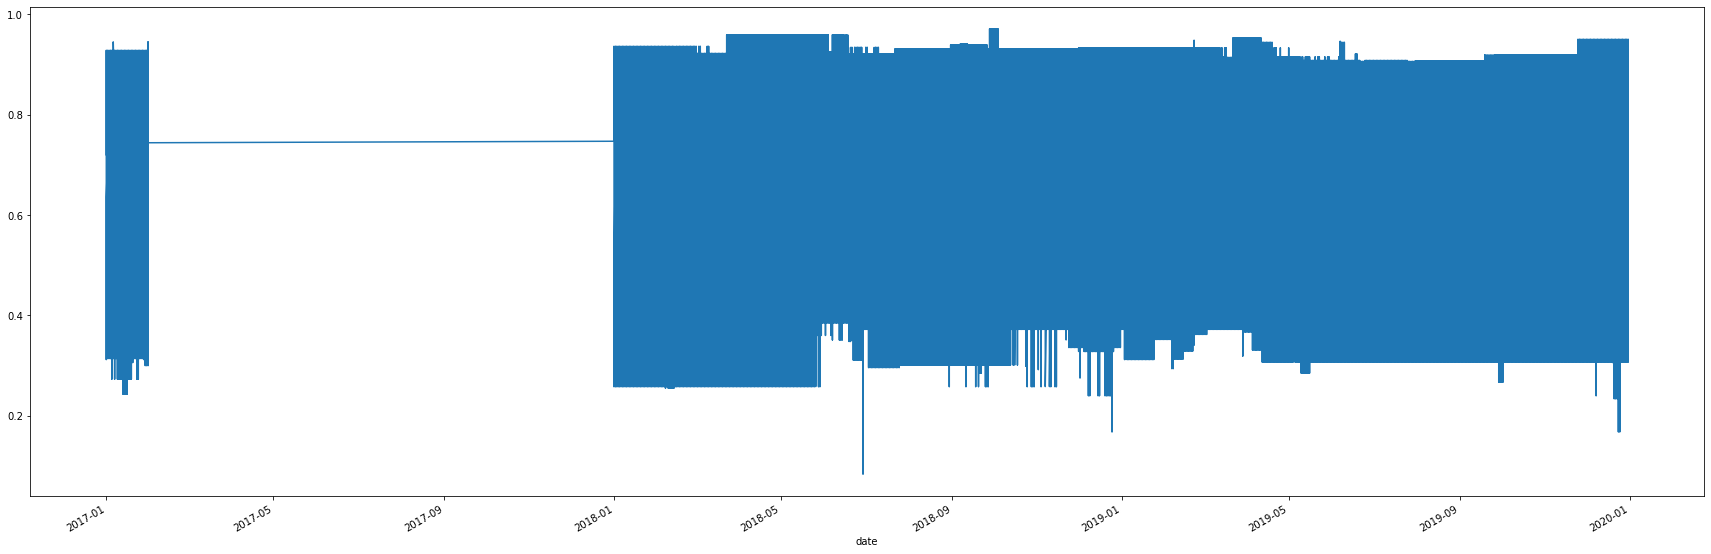

In [102]:
italy_17_19_df['danceability'].plot(figsize=(30,10))

<AxesSubplot:xlabel='date'>

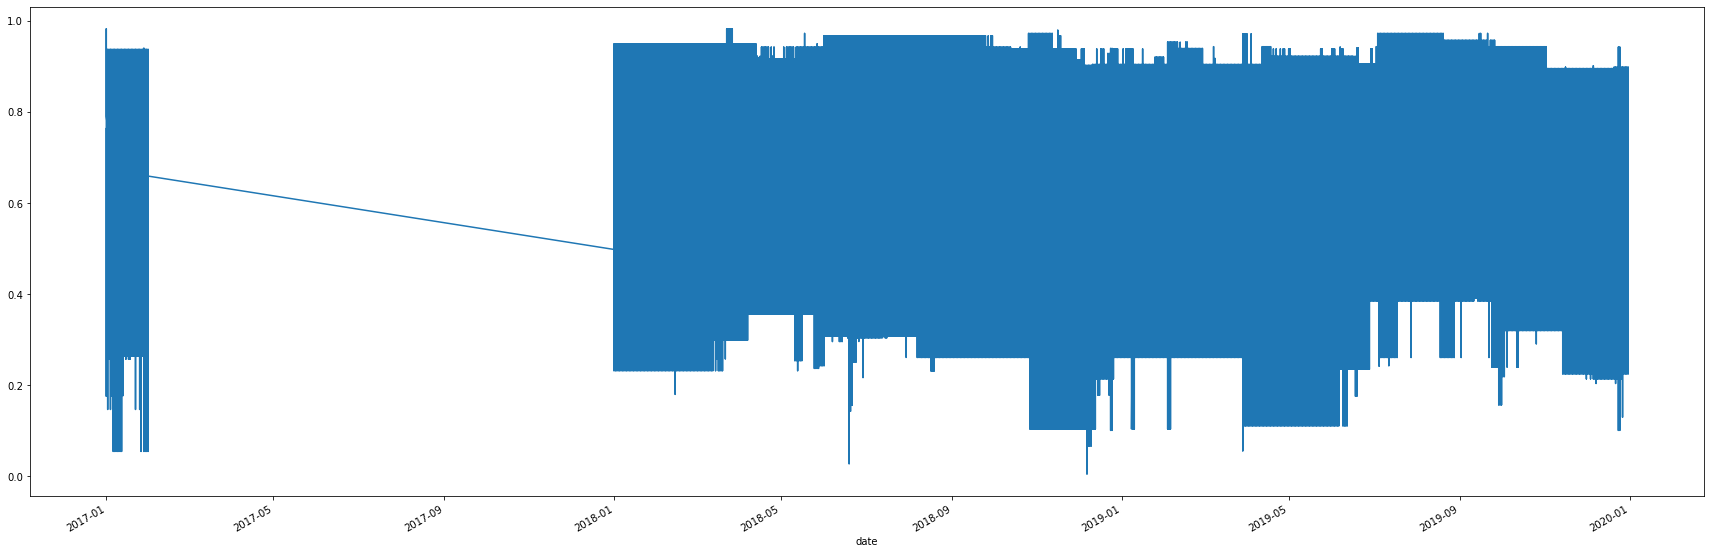

In [103]:
italy_17_19_df['energy'].plot(figsize=(30,10))

<AxesSubplot:xlabel='date'>

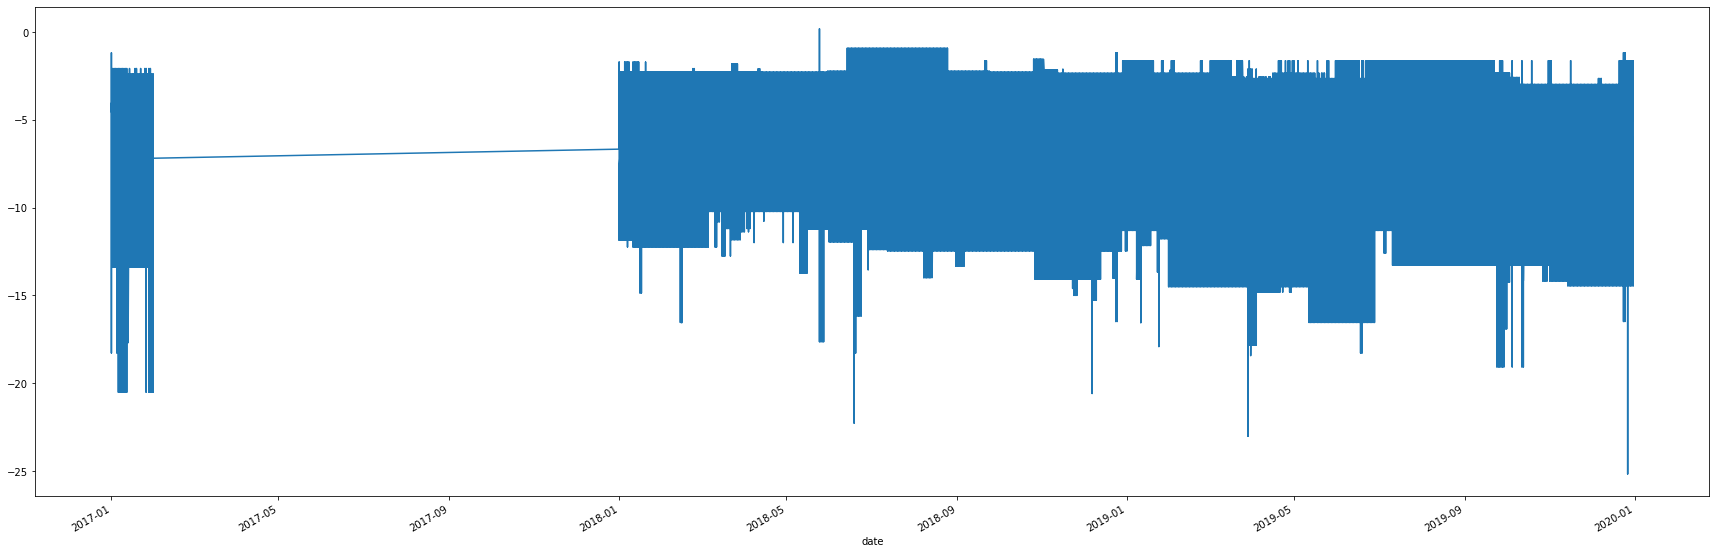

In [104]:
italy_17_19_df['loudness'].plot(figsize=(30,10))

In [114]:
italy_17_19_df.loc['2017-05-01']

KeyError: '2017-05-01'

In [115]:
italy_17_19_df.loc['2018-05-01']

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2018-05-01,1,Tesla (feat. Sfera Ebbasta & DrefGold),Capo Plaza,392564,it,093RgZ7RXHZwIrxZhZYX4Q,0.854,0.626,11,-5.140,1,0.0618,0.31600,0.000000,0.0961,0.377,140.050,185147,4
2018-05-01,2,Davide (feat. Coez),Gemitaiz,246029,it,1Lq5ApqhIWUXzlryFX2K6J,0.797,0.630,5,-7.601,1,0.0763,0.13600,0.000005,0.2070,0.761,126.006,206212,4
2018-05-01,3,Malibu,Vegas Jones,195510,it,08AN0HMXNr3DGGDCOWsTAw,0.809,0.544,0,-7.319,0,0.2270,0.07530,0.000000,0.0836,0.284,125.876,211519,4
2018-05-01,4,X,Nicky Jam,174848,it,39N9RPD9MRb5WmoLzNzPeA,0.595,0.773,9,-4.736,0,0.0549,0.03640,0.001080,0.3340,0.711,180.073,173628,4
2018-05-01,5,Ne è valsa la pena (feat. Ghali),Capo Plaza,174448,it,6GTCOWvhjvdk4pwlfrSjNO,0.593,0.654,5,-4.509,0,0.2180,0.11500,0.000000,0.2310,0.405,120.388,234600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-01,196,Solo Guai,Carl Brave x Franco126,20971,it,5kf8d9DoYJbQmiaYjsPobn,0.535,0.671,9,-7.542,1,0.3150,0.06270,0.000000,0.0772,0.442,154.737,167226,4
2018-05-01,197,OK,Robin Schulz,20886,it,3bWAqKDWg6u1davspr5IkS,0.653,0.810,7,-6.032,0,0.0558,0.11800,0.000000,0.1260,0.583,121.951,189307,4
2018-05-01,198,Hands Up (feat. DNCE),Merk & Kremont,20806,it,0nlyO7lNTOYB0gjDp7NI7H,0.755,0.725,4,-2.877,0,0.0673,0.11500,0.000000,0.1600,0.558,107.996,165785,4


In [ ]:
I think